In [54]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Read Data

In [55]:
df = web.DataReader('TSLA', data_source = 'yahoo', start = '2017-01-01', end='2021-06-02')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001
...,...,...,...,...,...,...
2021-05-26,626.169983,601.500000,607.559998,619.130005,28639300.0,619.130005
2021-05-27,631.130005,616.210022,620.239990,630.849976,26370600.0,630.849976
2021-05-28,635.590027,622.380005,628.500000,625.219971,22737000.0,625.219971


# Analysis

In [56]:
df.shape

(1111, 6)

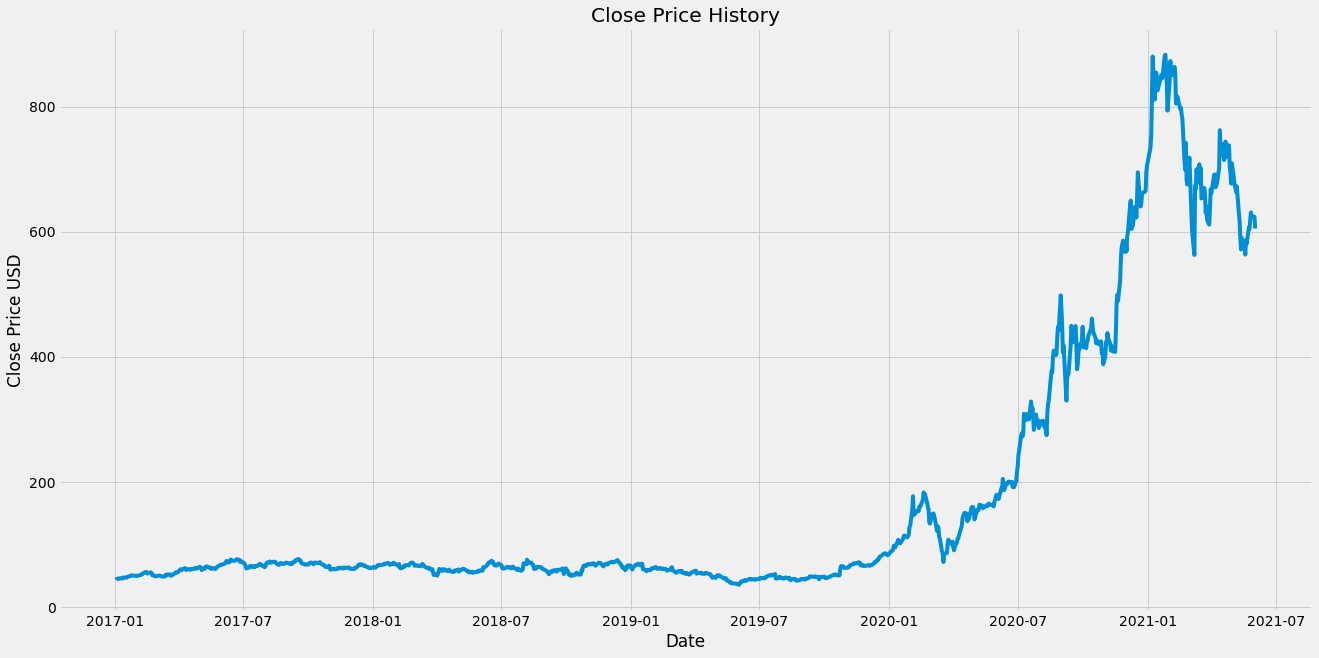

In [57]:
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

In [58]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

889

# Scale Data

In [59]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00897443],
       [0.01133488],
       [0.01127823],
       ...,
       [0.6956553 ],
       [0.69409747],
       [0.6719328 ]])

# Create training data

In [60]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [61]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [62]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(829, 60, 1)

# Build LSTM Model

In [63]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(1,activation='linear'))
#model.add(LSTM(50,return_sequences=False))
#.add(Dense(25))
#model.add(Dense(1))

In [64]:
model.compile(loss='mse',optimizer='rmsprop')
#model.compile(optimizer='adam',loss='mean_squared_error')

# Training

In [65]:
#model.fit(x_train, y_train, batch_size=1, epochs=1)
model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=10, epochs=20)

Epoch 1/20
83/83 [==============================] - 10s 58ms/step - loss: 7.1833e-04 - val_loss: 355092.0625
Epoch 2/20
83/83 [==============================] - 3s 33ms/step - loss: 2.1609e-04 - val_loss: 354969.4375
Epoch 3/20
83/83 [==============================] - 3s 32ms/step - loss: 2.1046e-04 - val_loss: 355270.6250
Epoch 4/20
83/83 [==============================] - 3s 37ms/step - loss: 1.2889e-04 - val_loss: 355083.9688
Epoch 5/20
83/83 [==============================] - 3s 36ms/step - loss: 1.0945e-04 - val_loss: 355048.6562
Epoch 6/20
83/83 [==============================] - 3s 35ms/step - loss: 1.3227e-04 - val_loss: 355198.1875
Epoch 7/20
83/83 [==============================] - 3s 34ms/step - loss: 1.1391e-04 - val_loss: 355173.1250
Epoch 8/20
83/83 [==============================] - 3s 36ms/step - loss: 6.9269e-05 - val_loss: 354940.7188
Epoch 9/20
83/83 [==============================] - 3s 35ms/step - loss: 8.9693e-05 - val_loss: 355161.1562
Epoch 10/20
83/83 [========

# Create test dataset

In [66]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [67]:
x_test= np.array(x_test)

In [68]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(222, 60, 1)

# Prediction

In [69]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [70]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

18.4078244046048

<ipython-input-72-5f39b370efdc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


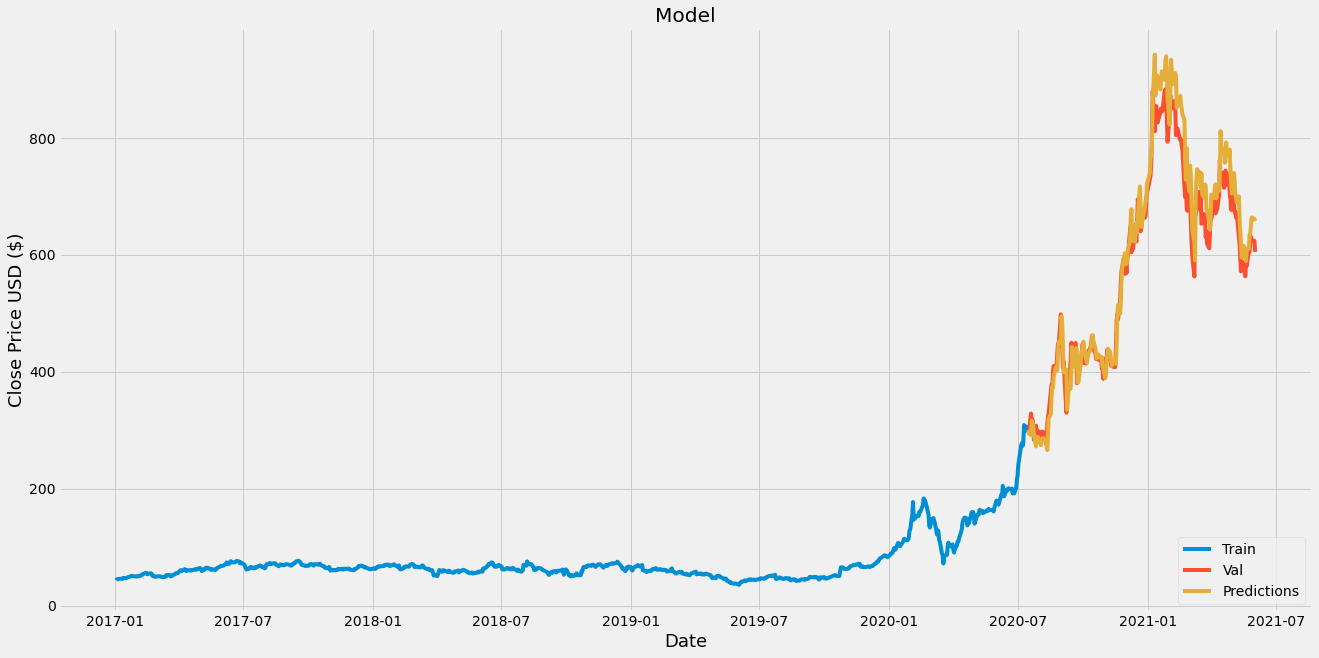

In [72]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [88]:
#show valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-16,300.127991,300.482666
2020-07-17,300.167999,294.559113
2020-07-20,328.600006,292.015228
2020-07-21,313.671997,316.500641
2020-07-22,318.466003,311.518311
...,...,...
2021-05-26,619.130005,637.370544
2021-05-27,630.849976,649.275146
2021-05-28,625.219971,664.191345


In [92]:
#Get the quote
tsla_quote = web.DataReader("TSLA", data_source='yahoo', start = '2017-01-01', end='2021-06-03')
#Create a new dataframe
new_df = tsla_quote.filter(['Close'])
#Get last 60 day closing price and convert dataframe to array
last_60_days = new_df[-60:].values
#Scale data
last_60_days_scaled = scaler.transform(last_60_days)

#add to x_test list and convert to np array + reshape
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

#Get predicted scaled price
pred_price = model.predict(X_test)
#Undo th scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[605.10565]]


In [93]:
tsla_quote2 = web.DataReader("TSLA", data_source='yahoo', start = '2021-06-01', end='2021-06-06')
print(tsla_quote2['Close'])

Date
2021-06-01    623.900024
2021-06-02    605.119995
2021-06-03    572.840027
2021-06-04    599.049988
Name: Close, dtype: float64
